<a href="https://colab.research.google.com/github/maddieshiell/assignment1apm/blob/main/APM466A1_shiellm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

APM466 Assignment 1 


Due: February 8, 2021

In [ ]:
!pip install bond-pricing

In [ ]:
import bond_pricing

In [52]:
# Importing packages
import numpy as np
import pandas as pd
import math
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime
import scipy.optimize as optimize
from scipy.interpolate import interp1d
from numpy import linalg as LA

In [5]:
# Import data collected from https://markets.businessinsider.com/
url = 'https://raw.githubusercontent.com/maddieshiell/assignment1_apm/main/APMDataA1_2.csv'
df_data = pd.read_csv(url)
df_data.head()  # Print a sample of the data

,Bond_Name,ISIN,Issue_Date,Maturity_Date,Coupon,18-Jan,19-Jan,20-Jan,21-Jan,22-Jan,25-Jan,26-Jan,27-Jan,28-Jan,29-Jan,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,CAN 2.25 Feb 1 2021,CA135087J629,2018-11-09,2021-02-01,0.0225,100.06,100.06,100.05,100.03,100.03,100.02,100.02,100.01,0.00,0.00,NaN,NaN,NaN,NaN
1,CAN 0.75 March 1 2021,CA135087F254,2015-10-19,2021-03-01,0.0075,100.08,100.08,100.08,100.07,100.07,100.06,100.06,100.06,100.06,100.06,NaN,NaN,NaN,NaN
2,CAN 10.5 March 15 2021,CA135087TZ75,1990-12-15,2021-03-15,0.1050,101.58,101.55,101.52,101.44,101.41,101.38,101.35,101.32,101.24,101.21,NaN,NaN,NaN,NaN
3,CAN 1.75 May 1 2021,CA135087J884,2019-02-11,2021-05-01,0.0175,100.48,100.47,100.46,100.45,100.44,100.44,100.43,100.43,100.42,100.41,NaN,NaN,NaN,NaN
4,CAN 9.75 June 1 2021,CA135087UE28,1991-05-09,2021-06-01,0.0975,103.50,103.48,103.44,103.36,103.34,103.31,103.28,103.26,103.18,103.15,NaN,NaN,NaN,NaN


In [6]:
df_data.shape

(42, 19)

In [7]:
columns_to_drop = ['Unnamed: 15','Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18']
df_data = df_data.drop(columns=columns_to_drop)
df_data.head()

,Bond_Name,ISIN,Issue_Date,Maturity_Date,Coupon,18-Jan,19-Jan,20-Jan,21-Jan,22-Jan,25-Jan,26-Jan,27-Jan,28-Jan,29-Jan
0,CAN 2.25 Feb 1 2021,CA135087J629,2018-11-09,2021-02-01,0.0225,100.06,100.06,100.05,100.03,100.03,100.02,100.02,100.01,0.00,0.00
1,CAN 0.75 March 1 2021,CA135087F254,2015-10-19,2021-03-01,0.0075,100.08,100.08,100.08,100.07,100.07,100.06,100.06,100.06,100.06,100.06
2,CAN 10.5 March 15 2021,CA135087TZ75,1990-12-15,2021-03-15,0.1050,101.58,101.55,101.52,101.44,101.41,101.38,101.35,101.32,101.24,101.21
3,CAN 1.75 May 1 2021,CA135087J884,2019-02-11,2021-05-01,0.0175,100.48,100.47,100.46,100.45,100.44,100.44,100.43,100.43,100.42,100.41
4,CAN 9.75 June 1 2021,CA135087UE28,1991-05-09,2021-06-01,0.0975,103.50,103.48,103.44,103.36,103.34,103.31,103.28,103.26,103.18,103.15


In [8]:
df_data = df_data[:36]

In [9]:
df_data.tail()

,Bond_Name,ISIN,Issue_Date,Maturity_Date,Coupon,18-Jan,19-Jan,20-Jan,21-Jan,22-Jan,25-Jan,26-Jan,27-Jan,28-Jan,29-Jan
31,CAN 8 June 1 2027,CA135087VW17,1996-05-01,2027-06-01,0.0800,146.60,146.57,146.46,146.21,146.28,146.48,146.37,146.49,146.30,146.21
32,CAN 2 June 1 2028,CA135087H235,2017-08-01,2028-06-01,0.0200,109.97,110.06,109.94,109.65,109.70,110.03,109.92,110.07,109.91,109.82
33,CAN 2.25 June 1 2029,CA135087J397,2018-07-27,2029-06-01,0.0225,112.59,112.61,112.43,112.11,112.27,112.62,112.50,112.70,112.49,112.41
34,CAN 5.75 June 1 2029,CA135087WL43,1998-02-02,2029-06-01,0.0575,140.81,140.83,140.61,140.24,140.39,140.78,140.66,140.86,140.60,140.50
35,CAN 0.5 Dec 1 2030,CA135087L443,2020-10-05,2030-12-01,0.0050,96.52,96.54,96.32,95.97,96.14,96.52,96.38,96.61,96.44,96.37


In [10]:
end_date = datetime.datetime(2021,2,1)

In [60]:
df

,index,Bond_Name,ISIN,Issue_Date,Maturity_Date,Coupon,18-Jan,19-Jan,20-Jan,21-Jan,22-Jan,25-Jan,26-Jan,27-Jan,28-Jan,29-Jan,num_months,ytm18-Jan,ytm19-Jan,ytm20-Jan,ytm21-Jan,ytm22-Jan,ytm25-Jan,ytm26-Jan,ytm27-Jan,ytm28-Jan,ytm29-Jan
0,6,CAN 1.5 August 1 2021,CA135087K296,2019-05-06,2021-08-01,0.0150,100.76,100.75,100.73,100.72,100.72,100.71,100.71,100.71,100.70,100.70,6,0.000769,0.000883,0.001186,0.001303,0.001232,0.001207,0.001134,0.001060,0.001181,0.001106
1,9,CAN 1.5 Feb 1 2022,CA135087K601,2019-11-04,2022-02-01,0.0150,101.44,101.44,101.41,101.40,101.40,101.38,101.38,101.39,101.38,101.38,12,0.001065,0.001029,0.001281,0.001341,0.001305,0.001390,0.001354,0.001219,0.001281,0.001244
2,14,CAN 0.25 August 1 2022,CA135087L286,2020-05-04,2022-08-01,0.0025,100.20,100.19,100.16,100.16,100.16,100.14,100.15,100.17,100.18,100.18,18,0.001195,0.001258,0.001452,0.001450,0.001448,0.001574,0.001507,0.001372,0.001304,0.001302
3,16,CAN 0.25 Feb 1 2023,CA135087L773,2020-10-26,2023-02-01,0.0025,100.13,100.12,100.10,100.10,100.10,100.08,100.09,100.12,100.12,100.13,24,0.001859,0.001908,0.002006,0.002005,0.002004,0.002102,0.002052,0.001901,0.001901,0.001850
4,18,CAN 1.5 June 1 2023,CA135087A610,2012-07-30,2023-06-01,0.0150,103.13,103.14,103.10,103.09,103.09,103.04,103.06,103.10,103.08,103.06,28,0.001751,0.001695,0.001846,0.001873,0.001858,0.002022,0.001924,0.001741,0.001810,0.001879
5,20,CAN 2.25 March 1 2024,CA135087J546,2018-10-05,2024-03-01,0.0225,106.21,106.21,106.17,106.15,106.17,106.12,106.18,106.22,106.19,106.18,37,0.002500,0.002483,0.002591,0.002637,0.002557,0.002663,0.002458,0.002316,0.002393,0.002407
6,23,CAN 1.5 Sept 1 2024,CA135087J967,2019-04-05,2024-09-01,0.0150,104.27,104.28,104.25,104.19,104.24,104.29,104.26,104.32,104.24,104.24,43,0.003125,0.003089,0.003162,0.003317,0.003172,0.003009,0.003082,0.002910,0.003120,0.003111
7,24,CAN 1.25 March 1 2025,CA135087K528,2019-10-11,2025-03-01,0.0125,103.60,103.60,103.59,103.51,103.54,103.62,103.59,103.66,103.61,103.57,49,0.003686,0.003680,0.003698,0.003885,0.003807,0.003597,0.003664,0.003489,0.003604,0.003695
8,27,CAN 0.5 Sept 1 2025,CA135087K940,2020-04-03,2025-09-01,0.0050,100.33,100.32,100.30,100.22,100.27,100.37,100.33,100.42,100.35,100.33,55,0.004278,0.004299,0.004342,0.004517,0.004407,0.004187,0.004274,0.004076,0.004229,0.004273
9,28,CAN 0.25 March 1 2026,CA135087L518,2020-10-09,2026-03-01,0.0025,98.78,98.77,98.76,98.66,98.71,98.84,98.83,98.93,98.86,98.81,61,0.004916,0.004937,0.004959,0.005160,0.005061,0.004805,0.004826,0.004628,0.004769,0.004870


In [170]:
# df_data['Maturity_Date'][0][5:7]

'02'

In [11]:
df_data['num_months'] = df_data['Maturity_Date']

for i in range(0,len(df_data)):
  df_data['num_months'][i] = -((end_date.year - int(df_data['Maturity_Date'][i][0:4])) * 12 + end_date.month - int(df_data['Maturity_Date'][i][5:7]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [147]:
bond_pricing.bond_price_breakup(settle, cpn, mat, yld=0.0007685331695580366, freq=2, comp_freq=2, face=100, redeem=None, daycount=None, return_dataframe=False)

{'AccruedInterest': 0.6986301369863013,
 'CleanPrice': 100.75999999999992,
 'DirtyPrice': 101.45863013698622,
 'NextCoupon': Timestamp('2021-02-01 00:00:00'),
 'PreviousCoupon': Timestamp('2020-08-01 00:00:00')}

In [12]:
#Chosen bonds to calculate yield curve
isin_list = ['CA135087K296','CA135087K601','CA135087L286','CA135087L773','CA135087A610','CA135087J546','CA135087J967','CA135087K528','CA135087K940','CA135087L518']

df = df_data.loc[df_data['ISIN'].isin(isin_list)]

In [ ]:
df["ytm18-Jan"] = df["18-Jan"] * 0
df["ytm19-Jan"] = df["18-Jan"] * 0
df["ytm20-Jan"] = df["18-Jan"] * 0
df["ytm21-Jan"] = df["18-Jan"] * 0
df["ytm22-Jan"] = df["18-Jan"] * 0
df["ytm25-Jan"] = df["18-Jan"] * 0
df["ytm26-Jan"] = df["18-Jan"] * 0
df["ytm27-Jan"] = df["18-Jan"] * 0
df["ytm28-Jan"] = df["18-Jan"] * 0
df["ytm29-Jan"] = df["18-Jan"] * 0


In [14]:
df = df.reset_index()

In [ ]:
settle = '2021-01-18'
mat = '2021-08-01'
cpn = 0.0150
price = 100.76
freq = 2
# Default daycount is Actual/365
bond_pricing.bond_yield(settle, cpn, mat, price, freq, comp_freq=2, face=100, redeem=None, daycount=None, guess=0.01)

In [148]:
df['Maturity_Date'][i]

datetime.datetime(2026, 3, 1, 0, 0)

In [15]:
for elem in ['18-Jan','19-Jan','20-Jan','21-Jan','22-Jan','25-Jan','26-Jan','27-Jan','28-Jan','29-Jan']:
  for i in range(0,len(df)):
    if elem == '18-Jan':
      date = '2021-01-18'
    elif elem == '19-Jan':
      date = '2021-01-19'
    elif elem == '20-Jan':
      date = '2021-01-20'
    elif elem == '21-Jan':
      date = '2021-01-21'
    elif elem == '22-Jan':
      date = '2021-01-22'
    elif elem == '25-Jan':
      date = '2021-01-25'
    elif elem == '26-Jan':
      date = '2021-01-26'
    elif elem == '27-Jan':
      date = '2021-01-27'
    elif elem == '28-Jan':
      date = '2021-01-28'
    elif elem == '29-Jan':
      date = '2021-01-29'
    settle = date
    mat = df['Maturity_Date'][i]
    cpn = df['Coupon'][i]
    price = df[elem][i]
    freq = 2
    # Default daycount is Actual/365
    df['ytm' + elem][i] = bond_pricing.bond_yield(settle, cpn, mat, price, freq, comp_freq=2, face=100, redeem=None, daycount=None, guess=0.01)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 1.0, 'Yield to Maturity on 0-5 Year Canadian Government Bonds')

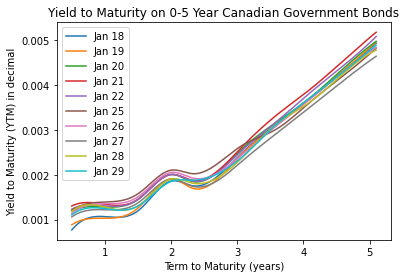

In [16]:
from scipy import interpolate
x = df['num_months']/12
y1 = df['ytm18-Jan']
y2 = df['ytm19-Jan']
y3 = df['ytm20-Jan']
y4 = df['ytm21-Jan']
y5 = df['ytm22-Jan']
y6 = df['ytm25-Jan']
y7 = df['ytm26-Jan']
y8 = df['ytm27-Jan']
y9 = df['ytm28-Jan']
y10 = df['ytm29-Jan']

x_new = np.linspace(0.5, 5.1, 1000)
a_BSpline1 = interpolate.make_interp_spline(x, y1)
y_new1 = a_BSpline1(x_new)
a_BSpline2 = interpolate.make_interp_spline(x, y2)
y_new2 = a_BSpline2(x_new)
a_BSpline3 = interpolate.make_interp_spline(x, y3)
y_new3 = a_BSpline3(x_new)
a_BSpline4 = interpolate.make_interp_spline(x, y4)
y_new4 = a_BSpline4(x_new)
a_BSpline5 = interpolate.make_interp_spline(x, y5)
y_new5 = a_BSpline5(x_new)
a_BSpline6 = interpolate.make_interp_spline(x, y6)
y_new6 = a_BSpline6(x_new)
a_BSpline7 = interpolate.make_interp_spline(x, y7)
y_new7 = a_BSpline7(x_new)
a_BSpline8 = interpolate.make_interp_spline(x, y8)
y_new8 = a_BSpline8(x_new)
a_BSpline9 = interpolate.make_interp_spline(x, y9)
y_new9 = a_BSpline9(x_new)
a_BSpline10 = interpolate.make_interp_spline(x, y10)
y_new10 = a_BSpline10(x_new)

plt.plot(x_new, y_new1)
plt.plot(x_new, y_new2)
plt.plot(x_new, y_new3)
plt.plot(x_new, y_new4)
plt.plot(x_new, y_new5)
plt.plot(x_new, y_new6)
plt.plot(x_new, y_new7)
plt.plot(x_new, y_new8)
plt.plot(x_new, y_new9)
plt.plot(x_new, y_new10)

plt.legend(["Jan 18", "Jan 19", "Jan 20", "Jan 21", "Jan 22", "Jan 25", "Jan 26", "Jan 27", "Jan 28", "Jan 29"])
plt.xlabel('Term to Maturity (years)')
plt.ylabel('Yield to Maturity (YTM) in decimal')
plt.title('Yield to Maturity on 0-5 Year Canadian Government Bonds')

Spot Curve Calculation

In [88]:
def calculating_spot_rates(price, par, T, cpn, prev_spot_rate, guess = 0.01):

    T = T/12
    cpn = cpn/2 * par

    if T == 1:
      spot_func = lambda y: (cpn)/(1 + prev_spot_rate)**1 + (cpn+par)/(1 + y)**2 - price
    elif T == 1.5:
      spot_func = lambda y: (cpn)/(1+prev_spot_rate[:-1][0])**1 + (cpn)/(1 + prev_spot_rate[1])**2 + (cpn+par)/(1+y)**3 - price
    elif T == 2:
      spot_func = lambda y: (cpn)/(1+prev_spot_rate[:-2][0])**1 + (cpn)/(1+prev_spot_rate[1])**2 + (cpn)/(1+prev_spot_rate[2])**3 + (cpn+par)/(1+y)**4 - price
    elif T == (28/12):
      spot_june1_21 = 0+(prev_spot_rate[:-3][0]-0)*((4/12)-0)/(0.5-0)
      spot_dec1_21 = (prev_spot_rate[:-3][0])+(prev_spot_rate[1]-prev_spot_rate[:-3][0])*((10/12)-0.5)/(1-0.5)
      spot_june1_22 = prev_spot_rate[1] + (prev_spot_rate[2]-prev_spot_rate[1]) * ((16/12) - 1)/(1.5-1)
      spot_dec1_22 = prev_spot_rate[2] + (prev_spot_rate[3]-prev_spot_rate[2]) * ((22/12) - 1.5)/(2-1.5)

      spot_func = lambda y: (cpn)/(1+spot_june1_21)**1 + (cpn)/(1+spot_dec1_21)**2 + (cpn)/(1+spot_june1_22)**3 + (cpn)/(1+spot_dec1_22)**4 + (cpn+par)/(1+y)**5 - price
    elif T == (37/12):
      spot_march1_21 = 0 + (prev_spot_rate[:-4][0] - 0)*((1/12)-0)/(0.5-0)
      spot_sept1_21 = prev_spot_rate[:-4][0] + (prev_spot_rate[1] - prev_spot_rate[:-4][0])*((7/12)-0.5)/(1-0.5)
      spot_march1_22 = prev_spot_rate[1] + (prev_spot_rate[2]-prev_spot_rate[1]) * ((13/12) - 1)/(1.5-1)
      spot_sept1_22 = prev_spot_rate[2] + (prev_spot_rate[3]-prev_spot_rate[2]) * ((19/12) - 1.5)/(2-1.5)
      spot_march1_23 = prev_spot_rate[3] + (prev_spot_rate[4]-prev_spot_rate[3]) * ((20/12) - 2)/((2+(28/12))-2)
      # This next rate needed to be linearly interpolated from March 1 2023 - Sept 1 2023 without a 2nd known point after the desired point
      func = lambda y: (cpn)/(1+spot_march1_21)**1 + (cpn)/(1+spot_sept1_21)**2 + (cpn)/(1+spot_march1_22)**3 + (cpn)/(1+spot_sept1_22)**4 + (cpn)/(1+spot_march1_23)**5 + (cpn+par)/(1+y)**6 - price
      spot_sept1_23 = optimize.newton(func, guess, tol = 1e-13, maxiter=10000)

      spot_func = lambda y: (cpn)/(1+spot_march1_21)**1 + (cpn)/(1+spot_sept1_21)**2 + (cpn)/(1+spot_march1_22)**3 + (cpn)/(1+spot_sept1_22)**4 + (cpn)/(1+spot_march1_23)**5 + (cpn)/(1+spot_sept1_23)**6 + (cpn+par)/(1+y)**7 - price
    elif T == (43/12):
      spot_march1_21 = 0 + (prev_spot_rate[:-5][0] - 0)*((1/12)-0)/(0.5-0)
      spot_sept1_21 = prev_spot_rate[:-5][0] + (prev_spot_rate[1] - prev_spot_rate[:-5][0])*((7/12)-0.5)/(1-0.5)
      spot_march1_22 = prev_spot_rate[1] + (prev_spot_rate[2]-prev_spot_rate[1]) * ((13/12) - 1)/(1.5-1)
      spot_sept1_22 = prev_spot_rate[2] + (prev_spot_rate[3]-prev_spot_rate[2]) * ((19/12) - 1.5)/(2-1.5)
      spot_march1_23 = prev_spot_rate[3] + (prev_spot_rate[4]-prev_spot_rate[3]) * ((20/12) - 2)/((28/12)-2)
      spot_sept1_23 = prev_spot_rate[4] + (prev_spot_rate[5]-prev_spot_rate[4]) * ((31/12) - (2+(28/12)))/((37/12)-(28/12))
      spot_func = lambda y: (cpn)/(1+spot_march1_21)**1 + (cpn)/(1+spot_sept1_21)**2 + (cpn)/(1+spot_march1_22)**3 + (cpn)/(1+spot_sept1_22)**4 + (cpn)/(1+spot_march1_23)**5 + (cpn)/(1+spot_sept1_23)**6 + (cpn)/(1+prev_spot_rate[5])**7 + (cpn+par)/(1+y)**8 - price
    elif T == (49/12):
      spot_march1_21 = 0 + (prev_spot_rate[:-6][0] - 0)*((1/12)-0)/(0.5-0)
      spot_sept1_21 = prev_spot_rate[:-6][0] + (prev_spot_rate[1] - prev_spot_rate[:-6][0])*((7/12)-0.5)/(1-0.5)
      spot_march1_22 = prev_spot_rate[1] + (prev_spot_rate[2]-prev_spot_rate[1]) * ((13/12) - 1)/(1.5-1)
      spot_sept1_22 = prev_spot_rate[2] + (prev_spot_rate[3]-prev_spot_rate[2]) * ((19/12) - 1.5)/(2-1.5)
      spot_march1_23 = prev_spot_rate[3] + (prev_spot_rate[4]-prev_spot_rate[3]) * ((20/12) - 2)/((28/12)-2)
      spot_sept1_23 = prev_spot_rate[4] + (prev_spot_rate[5]-prev_spot_rate[4]) * ((31/12) - (2+(28/12)))/((37/12)-(28/12))
      spot_func = lambda y: (cpn)/(1+spot_march1_21)**1 + (cpn)/(1+spot_sept1_21)**2 + (cpn)/(1+spot_march1_22)**3 + (cpn)/(1+spot_sept1_22)**4 + (cpn)/(1+spot_march1_23)**5 + (cpn)/(1+spot_sept1_23)**6 + (cpn)/(1+prev_spot_rate[5])**7 + (cpn)/(1+prev_spot_rate[6])**8 + (cpn+par)/(1+y)**9 - price
    elif T == (55/12):
      spot_march1_21 = 0 + (prev_spot_rate[:-7][0] - 0)*((1/12)-0)/(0.5-0)
      spot_sept1_21 = prev_spot_rate[:-7][0] + (prev_spot_rate[1] - prev_spot_rate[:-7][0])*((7/12)-0.5)/(1-0.5)
      spot_march1_22 = prev_spot_rate[1] + (prev_spot_rate[2]-prev_spot_rate[1]) * ((13/12) - 1)/(1.5-1)
      spot_sept1_22 = prev_spot_rate[2] + (prev_spot_rate[3]-prev_spot_rate[2]) * ((19/12) - 1.5)/(2-1.5)
      spot_march1_23 = prev_spot_rate[3] + (prev_spot_rate[4]-prev_spot_rate[3]) * ((20/12) - 2)/((28/12)-2)
      spot_sept1_23 = prev_spot_rate[4] + (prev_spot_rate[5]-prev_spot_rate[4]) * ((31/12) - (2+(28/12)))/((37/12)-(28/12))
      spot_func = lambda y: (cpn)/(1+spot_march1_21)**1 + (cpn)/(1+spot_sept1_21)**2 + (cpn)/(1+spot_march1_22)**3 + (cpn)/(1+spot_sept1_22)**4 + (cpn)/(1+spot_march1_23)**5 + (cpn)/(1+spot_sept1_23)**6 + (cpn)/(1+prev_spot_rate[5])**7 + (cpn)/(1+prev_spot_rate[6])**8 + (cpn)/(1+prev_spot_rate[7])**9 + (cpn+par)/(1+y)**10 - price
    elif T == (61/12):
      spot_march1_21 = 0 + (prev_spot_rate[:-8][0] - 0)*((1/12)-0)/(0.5-0)
      spot_sept1_21 = prev_spot_rate[:-8][0] + (prev_spot_rate[1] - prev_spot_rate[:-8][0])*((7/12)-0.5)/(1-0.5)
      spot_march1_22 = prev_spot_rate[1] + (prev_spot_rate[2]-prev_spot_rate[1]) * ((13/12) - 1)/(1.5-1)
      spot_sept1_22 = prev_spot_rate[2] + (prev_spot_rate[3]-prev_spot_rate[2]) * ((19/12) - 1.5)/(2-1.5)
      spot_march1_23 = prev_spot_rate[3] + (prev_spot_rate[4]-prev_spot_rate[3]) * ((20/12) - 2)/((28/12)-2)
      spot_sept1_23 = prev_spot_rate[4] + (prev_spot_rate[5]-prev_spot_rate[4]) * ((31/12) - (2+(28/12)))/((37/12)-(28/12))
      spot_func = lambda y: (cpn)/(1+spot_march1_21)**1 + (cpn)/(1+spot_sept1_21)**2 + (cpn)/(1+spot_march1_22)**3 + (cpn)/(1+spot_sept1_22)**4 + (cpn)/(1+spot_march1_23)**5 + (cpn)/(1+spot_sept1_23)**6 + (cpn)/(1+prev_spot_rate[5])**7 + (cpn)/(1+prev_spot_rate[6])**8 + (cpn)/(1+prev_spot_rate[7])**9 + (cpn)/(1+prev_spot_rate[8])**10 + (cpn+par)/(1+y)**11 - price

    return optimize.newton(spot_func, guess, tol = 1e-13, maxiter=10000)


In [89]:
#Bootstrapping spot curve
spot_rates = {}
#Defining spot rates for 6 month based off YTM for 6 month bonds
for elem in ['18-Jan','19-Jan','20-Jan','21-Jan','22-Jan','25-Jan','26-Jan','27-Jan','28-Jan','29-Jan']:
    spot_rates[elem] = df['ytm'+elem][0]

In [93]:
spot_rates

,18-Jan,19-Jan,20-Jan,21-Jan,22-Jan,25-Jan,26-Jan,27-Jan,28-Jan,29-Jan
0,0.000769,0.000883,0.001186,0.001303,0.001232,0.001207,0.001134,0.001060,0.001181,0.001106
1,0.000295,0.000295,0.000443,0.000492,0.000492,0.000592,0.000592,0.000542,0.000592,0.000592


In [91]:
spot_rates = pd.DataFrame(spot_rates, index= ['0'])

In [92]:
#Defining spot rates for 1 year
spot_1 = []
for elem in ['18-Jan','19-Jan','20-Jan','21-Jan','22-Jan','25-Jan','26-Jan','27-Jan','28-Jan','29-Jan']:
    spot_1.append(calculating_spot_rates(df[elem][1],100,df['num_months'][1],df['Coupon'][1],spot_rates[elem][0]))

spot_rates.loc[len(spot_rates)] = spot_1

In [94]:
#Defining spot rates for 1.5 year
spot_1_5 = []
for elem in ['18-Jan','19-Jan','20-Jan','21-Jan','22-Jan','25-Jan','26-Jan','27-Jan','28-Jan','29-Jan']:
    spot_1_5.append(calculating_spot_rates(df[elem][2],100,df['num_months'][2],df['Coupon'][2],spot_rates[elem]))

spot_rates.loc[len(spot_rates)] = spot_1_5

In [95]:
#Defining spot rates for 2 year
spot_2 = []
for elem in ['18-Jan','19-Jan','20-Jan','21-Jan','22-Jan','25-Jan','26-Jan','27-Jan','28-Jan','29-Jan']:
    spot_2.append(calculating_spot_rates(df[elem][3],100,df['num_months'][3],df['Coupon'][3],spot_rates[elem]))

spot_rates.loc[len(spot_rates)] = spot_2

In [23]:
spot_rates

,18-Jan,19-Jan,20-Jan,21-Jan,22-Jan,25-Jan,26-Jan,27-Jan,28-Jan,29-Jan
0,0.000769,0.000883,0.001186,0.001303,0.001232,0.001207,0.001134,0.001060,0.001181,0.001106
1,0.000295,0.000295,0.000443,0.000492,0.000492,0.000592,0.000592,0.000542,0.000592,0.000592
2,0.000583,0.000616,0.000716,0.000716,0.000716,0.000783,0.000749,0.000683,0.000649,0.000649
3,0.000925,0.000950,0.001000,0.001000,0.001000,0.001050,0.001025,0.000950,0.000950,0.000925


In [96]:
#Defining spot rates for 2.33 year
spot_2_33 = []
for elem in ['18-Jan','19-Jan','20-Jan','21-Jan','22-Jan','25-Jan','26-Jan','27-Jan','28-Jan','29-Jan']:
    #This bond would have coupons on June 1 and Dec 1 of each year instead of Aug 1 and Feb 1 like the previous ones - need to interpolate within the function
    spot_2_33.append(calculating_spot_rates(df[elem][4],100,df['num_months'][4],df['Coupon'][4],spot_rates[elem]))

spot_rates.loc[len(spot_rates)] = spot_2_33

In [97]:
#Defining spot rates for 3.08 year
spot_3_08 = []
for elem in ['18-Jan','19-Jan','20-Jan','21-Jan','22-Jan','25-Jan','26-Jan','27-Jan','28-Jan','29-Jan']:
    #This bond would have coupons on March 1 and Sept 1 of each year instead of Aug 1 and Feb 1 like most of the previous ones - need to interpolate within the function
    spot_3_08.append(calculating_spot_rates(df[elem][5],100,df['num_months'][5],df['Coupon'][5],spot_rates[elem]))

spot_rates.loc[len(spot_rates)] = spot_3_08

In [98]:
#Defining spot rates for 3.58 year
spot_3_58 = []
for elem in ['18-Jan','19-Jan','20-Jan','21-Jan','22-Jan','25-Jan','26-Jan','27-Jan','28-Jan','29-Jan']:
    #This bond would have coupons on March 1 and Sept 1 of each year instead of Aug 1 and Feb 1 like most of the previous ones - need to interpolate within the function
    spot_3_58.append(calculating_spot_rates(df[elem][6],100,df['num_months'][6],df['Coupon'][6],spot_rates[elem]))

spot_rates.loc[len(spot_rates)] = spot_3_58

In [99]:
#Defining spot rates for 4.08 year
spot_4_08 = []
for elem in ['18-Jan','19-Jan','20-Jan','21-Jan','22-Jan','25-Jan','26-Jan','27-Jan','28-Jan','29-Jan']:
    #This bond would have coupons on March 1 and Sept 1 of each year instead of Aug 1 and Feb 1 like most of the previous ones - need to interpolate within the function
    spot_4_08.append(calculating_spot_rates(df[elem][7],100,df['num_months'][7],df['Coupon'][7],spot_rates[elem]))

spot_rates.loc[len(spot_rates)] = spot_4_08

In [100]:
#Defining spot rates for 4.58 year
spot_4_58 = []
for elem in ['18-Jan','19-Jan','20-Jan','21-Jan','22-Jan','25-Jan','26-Jan','27-Jan','28-Jan','29-Jan']:
    #This bond would have coupons on March 1 and Sept 1 of each year instead of Aug 1 and Feb 1 like most of the previous ones - need to interpolate within the function
    spot_4_58.append(calculating_spot_rates(df[elem][8],100,df['num_months'][8],df['Coupon'][8],spot_rates[elem]))

spot_rates.loc[len(spot_rates)] = spot_4_58

In [101]:
#Defining spot rates for 4.58 year
spot_5_08 = []
for elem in ['18-Jan','19-Jan','20-Jan','21-Jan','22-Jan','25-Jan','26-Jan','27-Jan','28-Jan','29-Jan']:
    #This bond would have coupons on March 1 and Sept 1 of each year instead of Aug 1 and Feb 1 like most of the previous ones - need to interpolate within the function
    spot_5_08.append(calculating_spot_rates(df[elem][9],100,df['num_months'][9],df['Coupon'][9],spot_rates[elem]))

spot_rates.loc[len(spot_rates)] = spot_5_08

Text(0.5, 1.0, '1-5 Year Spot Rate curve')

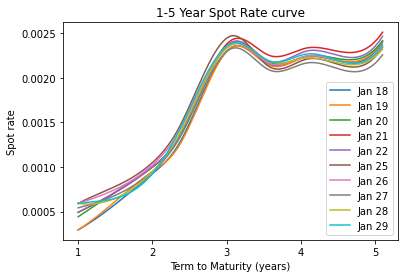

In [102]:
from scipy import interpolate
x = df['num_months'][1:]/12
y1 = spot_rates['18-Jan'][1:]
y2 = spot_rates['19-Jan'][1:]
y3 = spot_rates['20-Jan'][1:]
y4 = spot_rates['21-Jan'][1:]
y5 = spot_rates['22-Jan'][1:]
y6 = spot_rates['25-Jan'][1:]
y7 = spot_rates['26-Jan'][1:]
y8 = spot_rates['27-Jan'][1:]
y9 = spot_rates['28-Jan'][1:]
y10 = spot_rates['29-Jan'][1:]

x_new = np.linspace(1, 5.1, 1000)
a_BSpline1 = interpolate.make_interp_spline(x, y1)
y_new1 = a_BSpline1(x_new)
a_BSpline2 = interpolate.make_interp_spline(x, y2)
y_new2 = a_BSpline2(x_new)
a_BSpline3 = interpolate.make_interp_spline(x, y3)
y_new3 = a_BSpline3(x_new)
a_BSpline4 = interpolate.make_interp_spline(x, y4)
y_new4 = a_BSpline4(x_new)
a_BSpline5 = interpolate.make_interp_spline(x, y5)
y_new5 = a_BSpline5(x_new)
a_BSpline6 = interpolate.make_interp_spline(x, y6)
y_new6 = a_BSpline6(x_new)
a_BSpline7 = interpolate.make_interp_spline(x, y7)
y_new7 = a_BSpline7(x_new)
a_BSpline8 = interpolate.make_interp_spline(x, y8)
y_new8 = a_BSpline8(x_new)
a_BSpline9 = interpolate.make_interp_spline(x, y9)
y_new9 = a_BSpline9(x_new)
a_BSpline10 = interpolate.make_interp_spline(x, y10)
y_new10 = a_BSpline10(x_new)

plt.plot(x_new, y_new1)
plt.plot(x_new, y_new2)
plt.plot(x_new, y_new3)
plt.plot(x_new, y_new4)
plt.plot(x_new, y_new5)
plt.plot(x_new, y_new6)
plt.plot(x_new, y_new7)
plt.plot(x_new, y_new8)
plt.plot(x_new, y_new9)
plt.plot(x_new, y_new10)

plt.legend(["Jan 18", "Jan 19", "Jan 20", "Jan 21", "Jan 22", "Jan 25", "Jan 26", "Jan 27", "Jan 28", "Jan 29"])
plt.xlabel('Term to Maturity (years)')
plt.ylabel('Spot rate')
plt.title('1-5 Year Spot Rate curve')

Forward Curve Calculation


In [31]:
# 1 year forward curve for 2 - 5 years 
def calculating_1Y_fwd_rates(spot1, T1, spot2, T2):

    r = (1 + spot2)**T2/(1 + spot1)**T1 - 1  

    return r

In [32]:
df

,index,Bond_Name,ISIN,Issue_Date,Maturity_Date,Coupon,18-Jan,19-Jan,20-Jan,21-Jan,22-Jan,25-Jan,26-Jan,27-Jan,28-Jan,29-Jan,num_months,ytm18-Jan,ytm19-Jan,ytm20-Jan,ytm21-Jan,ytm22-Jan,ytm25-Jan,ytm26-Jan,ytm27-Jan,ytm28-Jan,ytm29-Jan
0,6,CAN 1.5 August 1 2021,CA135087K296,2019-05-06,2021-08-01,0.0150,100.76,100.75,100.73,100.72,100.72,100.71,100.71,100.71,100.70,100.70,6,0.000769,0.000883,0.001186,0.001303,0.001232,0.001207,0.001134,0.001060,0.001181,0.001106
1,9,CAN 1.5 Feb 1 2022,CA135087K601,2019-11-04,2022-02-01,0.0150,101.44,101.44,101.41,101.40,101.40,101.38,101.38,101.39,101.38,101.38,12,0.001065,0.001029,0.001281,0.001341,0.001305,0.001390,0.001354,0.001219,0.001281,0.001244
2,14,CAN 0.25 August 1 2022,CA135087L286,2020-05-04,2022-08-01,0.0025,100.20,100.19,100.16,100.16,100.16,100.14,100.15,100.17,100.18,100.18,18,0.001195,0.001258,0.001452,0.001450,0.001448,0.001574,0.001507,0.001372,0.001304,0.001302
3,16,CAN 0.25 Feb 1 2023,CA135087L773,2020-10-26,2023-02-01,0.0025,100.13,100.12,100.10,100.10,100.10,100.08,100.09,100.12,100.12,100.13,24,0.001859,0.001908,0.002006,0.002005,0.002004,0.002102,0.002052,0.001901,0.001901,0.001850
4,18,CAN 1.5 June 1 2023,CA135087A610,2012-07-30,2023-06-01,0.0150,103.13,103.14,103.10,103.09,103.09,103.04,103.06,103.10,103.08,103.06,28,0.001751,0.001695,0.001846,0.001873,0.001858,0.002022,0.001924,0.001741,0.001810,0.001879
5,20,CAN 2.25 March 1 2024,CA135087J546,2018-10-05,2024-03-01,0.0225,106.21,106.21,106.17,106.15,106.17,106.12,106.18,106.22,106.19,106.18,37,0.002500,0.002483,0.002591,0.002637,0.002557,0.002663,0.002458,0.002316,0.002393,0.002407
6,23,CAN 1.5 Sept 1 2024,CA135087J967,2019-04-05,2024-09-01,0.0150,104.27,104.28,104.25,104.19,104.24,104.29,104.26,104.32,104.24,104.24,43,0.003125,0.003089,0.003162,0.003317,0.003172,0.003009,0.003082,0.002910,0.003120,0.003111
7,24,CAN 1.25 March 1 2025,CA135087K528,2019-10-11,2025-03-01,0.0125,103.60,103.60,103.59,103.51,103.54,103.62,103.59,103.66,103.61,103.57,49,0.003686,0.003680,0.003698,0.003885,0.003807,0.003597,0.003664,0.003489,0.003604,0.003695
8,27,CAN 0.5 Sept 1 2025,CA135087K940,2020-04-03,2025-09-01,0.0050,100.33,100.32,100.30,100.22,100.27,100.37,100.33,100.42,100.35,100.33,55,0.004278,0.004299,0.004342,0.004517,0.004407,0.004187,0.004274,0.004076,0.004229,0.004273
9,28,CAN 0.25 March 1 2026,CA135087L518,2020-10-09,2026-03-01,0.0025,98.78,98.77,98.76,98.66,98.71,98.84,98.83,98.93,98.86,98.81,61,0.004916,0.004937,0.004959,0.005160,0.005061,0.004805,0.004826,0.004628,0.004769,0.004870


In [33]:
# Defining 1Y forward rates starting at year 1
fwd_rates = {}

for elem in ['18-Jan','19-Jan','20-Jan','21-Jan','22-Jan','25-Jan','26-Jan','27-Jan','28-Jan','29-Jan']:
    spot_1 = spot_rates[elem][1]
    spot_2 = spot_rates[elem][3]
    fwd_rates[elem] = calculating_1Y_fwd_rates(spot_1,1,spot_2,2)

In [34]:
fwd_rates = pd.DataFrame(fwd_rates, index= ['0'])

In [35]:
fwd_rates

,18-Jan,19-Jan,20-Jan,21-Jan,22-Jan,25-Jan,26-Jan,27-Jan,28-Jan,29-Jan
0,0.001555,0.001606,0.001558,0.001508,0.001508,0.001509,0.001458,0.001357,0.001308,0.001257


In [36]:
# Defining 1Y forward rates starting at year 3
fwd_2 = []

for elem in ['18-Jan','19-Jan','20-Jan','21-Jan','22-Jan','25-Jan','26-Jan','27-Jan','28-Jan','29-Jan']:
    spot_2 = spot_rates[elem][3]
    spot_3 = spot_rates[elem][4] + (spot_rates[elem][5] - spot_rates[elem][4]) * (3 - 28/12)/(37/12 - 28/12)
    fwd_2.append(calculating_1Y_fwd_rates(spot_2,2,spot_3,3))

fwd_rates.loc[len(fwd_rates)] = fwd_2

In [37]:
# Defining 1Y forward rates starting at year 3
fwd_25 = []

for elem in ['18-Jan','19-Jan','20-Jan','21-Jan','22-Jan','25-Jan','26-Jan','27-Jan','28-Jan','29-Jan']:
    spot_25 = spot_rates[elem][4] + (spot_rates[elem][5] - spot_rates[elem][4]) * (2.5 - 28/12)/(37/12 - 28/12)
    spot_35 = spot_rates[elem][5] + (spot_rates[elem][6] - spot_rates[elem][5]) * (3.5 - 37/12)/(43/12 - 37/12)
    fwd_25.append(calculating_1Y_fwd_rates(spot_25,2.5,spot_35,3.5)) 

fwd_rates.loc[len(fwd_rates)] = fwd_25

In [38]:
# Defining 1Y forward rates starting at year 3
fwd_3 = []

for elem in ['18-Jan','19-Jan','20-Jan','21-Jan','22-Jan','25-Jan','26-Jan','27-Jan','28-Jan','29-Jan']:
    spot_3 = spot_rates[elem][4] + (spot_rates[elem][5] - spot_rates[elem][4]) * (3 - 28/12)/(37/12 - 28/12)
    spot_4 = spot_rates[elem][6] + (spot_rates[elem][7] - spot_rates[elem][6]) * (4 - 43/12)/(49/12 - 43/12)
    fwd_3.append(calculating_1Y_fwd_rates(spot_3,3,spot_4,4)) 

fwd_rates.loc[len(fwd_rates)] = fwd_3

In [39]:
# Defining 1Y forward rates starting at year 3.5
fwd_35 = []

for elem in ['18-Jan','19-Jan','20-Jan','21-Jan','22-Jan','25-Jan','26-Jan','27-Jan','28-Jan','29-Jan']:
    spot_35 = spot_rates[elem][5] + (spot_rates[elem][6] - spot_rates[elem][5]) * (3.5 - 37/12)/(43/12 - 37/12)
    spot_45 = spot_rates[elem][7] + (spot_rates[elem][8] - spot_rates[elem][7]) * (4.5 - 49/12)/(55/12 - 49/12)
    fwd_35.append(calculating_1Y_fwd_rates(spot_35,3.5,spot_45,4.5)) 

fwd_rates.loc[len(fwd_rates)] = fwd_35

In [40]:
# Defining 1Y forward rates starting at year 4
fwd_4 = []

for elem in ['18-Jan','19-Jan','20-Jan','21-Jan','22-Jan','25-Jan','26-Jan','27-Jan','28-Jan','29-Jan']:
    spot_4 = spot_rates[elem][6] + (spot_rates[elem][7] - spot_rates[elem][6]) * (4 - 43/12)/(49/12 - 43/12)
    spot_5 = spot_rates[elem][8] + (spot_rates[elem][9] - spot_rates[elem][8]) * (5 - 55/12)/(61/12 - 55/12)
    fwd_4.append(calculating_1Y_fwd_rates(spot_4,4,spot_5,5)) 

fwd_rates.loc[len(fwd_rates)] = fwd_4

Text(0.5, 1.0, '1-Year Forward Rate curve')

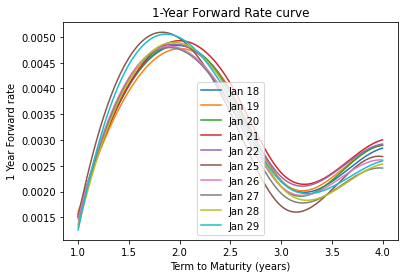

In [41]:
from scipy import interpolate
x = [1,2,2.5,3,3.5,4]
y1 = fwd_rates['18-Jan']
y2 = fwd_rates['19-Jan']
y3 = fwd_rates['20-Jan']
y4 = fwd_rates['21-Jan']
y5 = fwd_rates['22-Jan']
y6 = fwd_rates['25-Jan']
y7 = fwd_rates['26-Jan']
y8 = fwd_rates['27-Jan']
y9 = fwd_rates['28-Jan']
y10 = fwd_rates['29-Jan']

x_new = np.linspace(1, 4, 1000)
a_BSpline1 = interpolate.make_interp_spline(x, y1)
y_new1 = a_BSpline1(x_new)
a_BSpline2 = interpolate.make_interp_spline(x, y2)
y_new2 = a_BSpline2(x_new)
a_BSpline3 = interpolate.make_interp_spline(x, y3)
y_new3 = a_BSpline3(x_new)
a_BSpline4 = interpolate.make_interp_spline(x, y4)
y_new4 = a_BSpline4(x_new)
a_BSpline5 = interpolate.make_interp_spline(x, y5)
y_new5 = a_BSpline5(x_new)
a_BSpline6 = interpolate.make_interp_spline(x, y6)
y_new6 = a_BSpline6(x_new)
a_BSpline7 = interpolate.make_interp_spline(x, y7)
y_new7 = a_BSpline7(x_new)
a_BSpline8 = interpolate.make_interp_spline(x, y8)
y_new8 = a_BSpline8(x_new)
a_BSpline9 = interpolate.make_interp_spline(x, y9)
y_new9 = a_BSpline9(x_new)
a_BSpline10 = interpolate.make_interp_spline(x, y10)
y_new10 = a_BSpline10(x_new)

plt.plot(x_new, y_new1)
plt.plot(x_new, y_new2)
plt.plot(x_new, y_new3)
plt.plot(x_new, y_new4)
plt.plot(x_new, y_new5)
plt.plot(x_new, y_new6)
plt.plot(x_new, y_new7)
plt.plot(x_new, y_new8)
plt.plot(x_new, y_new9)
plt.plot(x_new, y_new10)

plt.legend(["Jan 18", "Jan 19", "Jan 20", "Jan 21", "Jan 22", "Jan 25", "Jan 26", "Jan 27", "Jan 28", "Jan 29"],loc='best')
plt.xlabel('Term to Maturity (years)')
plt.ylabel('1 Year Forward rate')
plt.title('1-Year Forward Rate curve')

Covariance Matrices

In [117]:
df

,index,Bond_Name,ISIN,Issue_Date,Maturity_Date,Coupon,18-Jan,19-Jan,20-Jan,21-Jan,22-Jan,25-Jan,26-Jan,27-Jan,28-Jan,29-Jan,num_months,ytm18-Jan,ytm19-Jan,ytm20-Jan,ytm21-Jan,ytm22-Jan,ytm25-Jan,ytm26-Jan,ytm27-Jan,ytm28-Jan,ytm29-Jan
0,6,CAN 1.5 August 1 2021,CA135087K296,2019-05-06,2021-08-01,0.0150,100.76,100.75,100.73,100.72,100.72,100.71,100.71,100.71,100.70,100.70,6,0.000769,0.000883,0.001186,0.001303,0.001232,0.001207,0.001134,0.001060,0.001181,0.001106
1,9,CAN 1.5 Feb 1 2022,CA135087K601,2019-11-04,2022-02-01,0.0150,101.44,101.44,101.41,101.40,101.40,101.38,101.38,101.39,101.38,101.38,12,0.001065,0.001029,0.001281,0.001341,0.001305,0.001390,0.001354,0.001219,0.001281,0.001244
2,14,CAN 0.25 August 1 2022,CA135087L286,2020-05-04,2022-08-01,0.0025,100.20,100.19,100.16,100.16,100.16,100.14,100.15,100.17,100.18,100.18,18,0.001195,0.001258,0.001452,0.001450,0.001448,0.001574,0.001507,0.001372,0.001304,0.001302
3,16,CAN 0.25 Feb 1 2023,CA135087L773,2020-10-26,2023-02-01,0.0025,100.13,100.12,100.10,100.10,100.10,100.08,100.09,100.12,100.12,100.13,24,0.001859,0.001908,0.002006,0.002005,0.002004,0.002102,0.002052,0.001901,0.001901,0.001850
4,18,CAN 1.5 June 1 2023,CA135087A610,2012-07-30,2023-06-01,0.0150,103.13,103.14,103.10,103.09,103.09,103.04,103.06,103.10,103.08,103.06,28,0.001751,0.001695,0.001846,0.001873,0.001858,0.002022,0.001924,0.001741,0.001810,0.001879
5,20,CAN 2.25 March 1 2024,CA135087J546,2018-10-05,2024-03-01,0.0225,106.21,106.21,106.17,106.15,106.17,106.12,106.18,106.22,106.19,106.18,37,0.002500,0.002483,0.002591,0.002637,0.002557,0.002663,0.002458,0.002316,0.002393,0.002407
6,23,CAN 1.5 Sept 1 2024,CA135087J967,2019-04-05,2024-09-01,0.0150,104.27,104.28,104.25,104.19,104.24,104.29,104.26,104.32,104.24,104.24,43,0.003125,0.003089,0.003162,0.003317,0.003172,0.003009,0.003082,0.002910,0.003120,0.003111
7,24,CAN 1.25 March 1 2025,CA135087K528,2019-10-11,2025-03-01,0.0125,103.60,103.60,103.59,103.51,103.54,103.62,103.59,103.66,103.61,103.57,49,0.003686,0.003680,0.003698,0.003885,0.003807,0.003597,0.003664,0.003489,0.003604,0.003695
8,27,CAN 0.5 Sept 1 2025,CA135087K940,2020-04-03,2025-09-01,0.0050,100.33,100.32,100.30,100.22,100.27,100.37,100.33,100.42,100.35,100.33,55,0.004278,0.004299,0.004342,0.004517,0.004407,0.004187,0.004274,0.004076,0.004229,0.004273
9,28,CAN 0.25 March 1 2026,CA135087L518,2020-10-09,2026-03-01,0.0025,98.78,98.77,98.76,98.66,98.71,98.84,98.83,98.93,98.86,98.81,61,0.004916,0.004937,0.004959,0.005160,0.005061,0.004805,0.004826,0.004628,0.004769,0.004870


In [119]:
return_matrix = {}
dates = ['ytm18-Jan','ytm19-Jan','ytm20-Jan','ytm21-Jan','ytm22-Jan','ytm25-Jan','ytm26-Jan','ytm27-Jan','ytm28-Jan','ytm29-Jan']
ret_dict = {}
for i in range(0,10): #Loop through bonds
  ret_list = []
  for j in range(0,9): #Loop through dates
    ret = math.log(df[dates[j+1]][i]/df[dates[j]][i])
    ret_list.append(ret)
  ret_dict[i] = ret_list


In [120]:
index1 = list(ret_dict.keys())
ret_df = pd.DataFrame(ret_dict, index= index1[0:9])

In [121]:
ret_df = ret_df.loc[:, [1, 3, 5, 7, 9]]
ret_df = ret_df.T

In [122]:
ret_df

,0,1,2,3,4,5,6,7,8
1,-0.034947,0.219102,0.046028,-0.027329,0.063507,-0.026539,-0.104814,0.049062,-0.029329
3,0.025719,0.050071,-0.000332,-0.000333,0.047467,-0.024239,-0.076011,-0.000428,-0.027087
5,-0.006780,0.042424,0.017408,-0.030510,0.040469,-0.079994,-0.059643,0.032642,0.005933
7,-0.001548,0.004966,0.049262,-0.020234,-0.056689,0.018337,-0.048843,0.032385,0.024905
9,0.004311,0.004297,0.039770,-0.019293,-0.051923,0.004412,-0.042081,0.030074,0.021048


In [123]:
dates = ['18-Jan','19-Jan','20-Jan','21-Jan','22-Jan','25-Jan','26-Jan','27-Jan','28-Jan','29-Jan']
ret_dict_fwd = {}
for i in range(0,6): #Loop through bonds
  ret_list_fwd = []
  for j in range(0,9): #Loop through dates
    if i == 0:
      ret = math.log(fwd_rates[dates[j+1]][:-5]/fwd_rates[dates[j]][:-5])
    else:
      ret = math.log(fwd_rates[dates[j+1]][i]/fwd_rates[dates[j]][i])
    ret_list_fwd.append(ret)
  ret_dict_fwd[i] = ret_list_fwd

In [124]:
index2 = list(ret_dict.keys())
ret_df_fwd = pd.DataFrame(ret_dict_fwd, index= index2[0:9])

In [125]:
ret_df_fwd = ret_df_fwd.loc[:, [0, 1, 3, 5]]
ret_df_fwd = ret_df_fwd.T

In [126]:
ret_df_fwd

,0,1,2,3,4,5,6,7,8
0,0.031949,-0.030500,-0.032260,-0.000146,0.000395,-0.033969,-0.071710,-0.037055,-0.039313
1,-0.012338,0.014824,0.016661,-0.015467,0.024417,-0.038931,-0.004970,0.026281,0.020922
3,-0.000033,-0.054073,0.120113,-0.033876,-0.284988,0.198588,-0.064958,0.061980,0.045499
5,0.019638,-0.000190,0.036229,-0.027829,-0.086863,-0.025083,-0.061715,0.031246,0.023720


In [127]:
cov_yields = np.cov(ret_df)
cov_fwds = np.cov(ret_df_fwd)

In [129]:
cov_yields

array([[8.55283274e-03, 2.81911327e-03, 3.02417766e-03, 7.26229816e-04,
        6.45545109e-04],
       [2.81911327e-03, 1.56475111e-03, 1.26888992e-03, 1.11844704e-05,
        4.47421081e-05],
       [3.02417766e-03, 1.26888992e-03, 1.95169697e-03, 2.57978700e-04,
        3.19574137e-04],
       [7.26229816e-04, 1.11844704e-05, 2.57978700e-04, 1.30838097e-03,
        1.11809330e-03],
       [6.45545109e-04, 4.47421081e-05, 3.19574137e-04, 1.11809330e-03,
        9.76869173e-04]])

In [130]:
eig_vals_yields,eig_vectors_yields = LA.eig(cov_yields)
eig_vals_fwds,eig_vectors_fwds = LA.eig(cov_fwds)

In [131]:
eig_vals_yields

array([1.08837410e-02, 2.20722327e-03, 8.44878601e-04, 4.11762520e-04,
       6.92553507e-06])

In [132]:
eig_vectors_yields

array([[-8.76600438e-01, -4.78041352e-02, -4.56518462e-01,
        -1.42223121e-01,  2.54934057e-02],
       [-3.12852871e-01, -2.02325864e-01,  3.54810444e-01,
         8.57494356e-01,  5.51704826e-04],
       [-3.46547398e-01, -2.52078371e-02,  8.09248981e-01,
        -4.67181327e-01, -7.82761791e-02],
       [-8.54529007e-02,  7.42742323e-01,  5.82009054e-03,
         1.42082169e-01, -6.48699026e-01],
       [-7.93565048e-02,  6.35985390e-01,  1.03839568e-01,
         7.76548682e-02,  7.56579272e-01]])

In [109]:
eig_vals_fwds

array([1.96942189e-02, 5.60816705e-05, 1.32699429e-03, 8.69682535e-04])

Text(0.5, 1.0, 'CAD Government Bond YTM curve PCA Analysis')

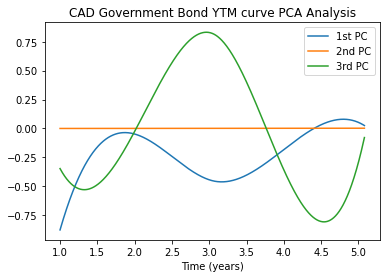

In [138]:
x = [1,2,3.08,4.08,5.08]
y1 = eig_vectors_yields[0]
y2 = eig_vectors_yields[1]
y3 = eig_vectors_yields[2]

x_new = np.linspace(1, 5.08, 1000)
a_BSpline1 = interpolate.make_interp_spline(x, y1)
y_new1 = a_BSpline1(x_new)
a_BSpline2 = interpolate.make_interp_spline(x, y2)
y_new3 = a_BSpline2(x_new)
a_BSpline3 = interpolate.make_interp_spline(x, y3)
y_new3 = a_BSpline3(x_new)

plt.plot(x_new, y_new1)
plt.plot(x_new, y_new2)
plt.plot(x_new, y_new3)
# plt.plot(['1yr','2yr','3.08yr','4.08yr', '5.08yr'], eig_vectors_yields[0])
# plt.plot(['1yr','2yr','3.08yr','4.08yr', '5.08yr'], eig_vectors_yields[1])
# plt.plot(['1yr','2yr','3.08yr','4.08yr', '5.08yr'], eig_vectors_yields[2])
plt.legend(["1st PC","2nd PC","3rd PC"],loc='best')
plt.xlabel('Time (years)')
plt.title('CAD Government Bond YTM curve PCA Analysis')

Text(0.5, 1.0, '1-Year Forward Rate curve PCA Analysis')

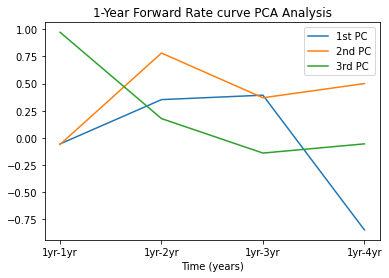

In [115]:
plt.plot(['1yr-1yr','1yr-2yr','1yr-3yr','1yr-4yr'], eig_vectors_fwds[0])
plt.plot(['1yr-1yr','1yr-2yr','1yr-3yr','1yr-4yr'], eig_vectors_fwds[1])
plt.plot(['1yr-1yr','1yr-2yr','1yr-3yr','1yr-4yr'], eig_vectors_fwds[2])
plt.legend(["1st PC","2nd PC","3rd PC"],loc='best')
plt.xlabel('Time (years)')
plt.title('1-Year Forward Rate curve PCA Analysis')